# <span style="color:red">Seaborn | Part-12: Bar Plot</span>

Today we are here to discuss one of the most widely used type of figure in *Research* & *Business* domain. Few refer to it as **Bar Chart**, few call these **Bar Graph**, but we are going to stick with **<span style="color:green">Bar Plot</span>** (well because that is how Seaborn addresses it).

This plot presents *Categorical data* with **rectangular bars** with *height* (may call it 'length') proportional to the values that they represent, and can be plotted *vertically* or *horizontally*. When plotted vertically, these are often referred to as a **Line Graph**. List of names just doesn't end there, so here comes one more: If this Bar plot is arranged from *highest* to *lowest* incidence of categories being plotted, then it is also referred to as **Pareto Chart**.

Let us now try to interpret a **Bar Plot**: So, it is actually a pictorial representation of statistical data in which the *independent variable* attains only the *discrete values*. On the other hand, the *dependent variable* can either be *discrete* or *continuous*, and this is what represents bar of different heights. We shall now segregate the types of Bar Plot that are often found in use:

- At first we have **<span style="color:red">Simple Bar Plot</span>** that conveys *discrete* value of an item for each category shown on the corresponding axis by plotting bars of *equal width* but *variable length*. These can be further classified into *Spatial* and *Quantitative*.

- Next is **<span style="color:red">Grouped Bar Plot</span>**, where we may have either *Scalar* or *Ordinal Independent variable*. In this plot, we observe the bars for *categorical variable values* kind of very *close* to each other, and hence the name. This type of plot is often used to represent **time** (possibly in *week*, *month* and *year*).

- Next variety is **<span style="color:red">Stacked Bar Plot</span>**, where bars represent the *sub-groups*, and are placed on top of each other to form a single column (or say, single bar). Here overall length of the bar gives us the total size of the category, and *different colors* indicate their relative contribution to each sub-group. On the downside, this piling hints no common baseline for individual bar elements; and that has an adverse effect when comparing these subcategories.

- Finally, we have **<span style="color:red">Range Bar Plot</span>**, that reflect *variations among the dependent variable* values of our dataset, as *range interval data*. Corresponding bars *begins at first dependent variable* value for that particular bar, rather than starting at a *common zero point*.

To conclude the *types of Bar plot*, at the end now I am going to mention another variety, that is **Dot Plot**, or commonly known in Seaborn as **<span style="color:red">Point Plot</span>**. This is one of the simplest ways to represent information pictorially, yet somehow this is a graph that is least used. And before I jump into what Seaborn has in stock to offer, I have a general piece of advice for you: **"Whenever you find your requirement from the dataset suitable for a Bar Plot, always focus on the number of categories you're trying to compare. Though there is no Thumb rule, I would advise to stick to a Line Plot (one with vertical bars) if you have more than 10 items to compare, or else, it is visually appealing to have a Horizontal Bar Plot instead."** But again, this is just a *personal opinion/preference* and you are ofcourse free to choose any type of plot.

Back to our routine, we are now going to fetch our dependencies and then plot a basic Bar Plot for further discussion elucidating representation of **Central Tendency** and **CI (Confidence Interval)**. In case these terms don't sound familiar, I would recommend revising the *lecture on Box Plot*, where we have covered these topics pretty much in detail.

In [1]:
# Importing intrinsic libraries:
import numpy as np
import pandas as pd
np.random.seed(101)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="whitegrid", palette="rainbow")
import warnings
warnings.filterwarnings("ignore")

# Let us also get tableau colors we defined earlier:
tableau_20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),
         (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),
         (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),
         (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),
         (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]

# Scaling above RGB values to [0, 1] range, which is Matplotlib acceptable format:
for i in range(len(tableau_20)):
    r, g, b = tableau_20[i]
    tableau_20[i] = (r / 255., g / 255., b / 255.)

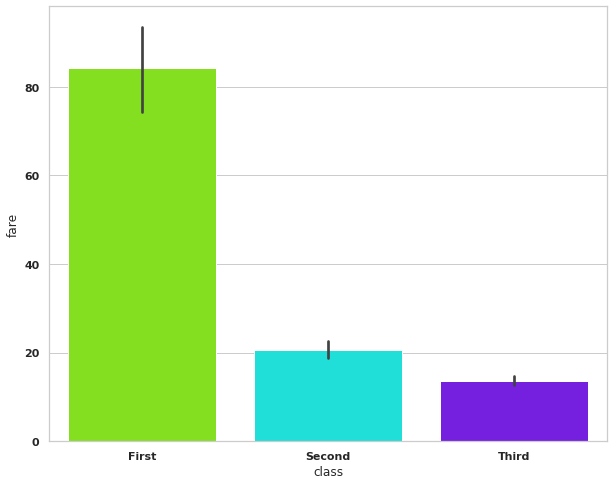

In [39]:
# Loading built-in Tips dataset:
titanic = sns.load_dataset("titanic")

# Pre-viewing Dataset:
titanic.head(5)

# Plotting basic Violin Plot:
sns.barplot(x="class", y="fare", data=titanic, palette="hsv")

*So now I am going to quickly grab a cup of coffee and you guys need to utilize this time in guessing the type of Bar Plot this is. Keep thinking and I will be right back!*

And, I a am back! I'm sure by now you would have guessed the type of Bar plot we have in front of us; and you are RIGHT! Indeed, this is a **Simple Bar plot**; or we may even call it a **Line Plot**. On *X-axis*, our plot has the *Class of passengers* travelling on Titanic and on *Y-axis*, we have corresponding *Ticket fare*.

There is another type of plot with Seaborn which is very much identical to Bar Plot, and that is a **<span style="color:red">"Count Plot"</span>**, so we shall quickly have a look at it as well:

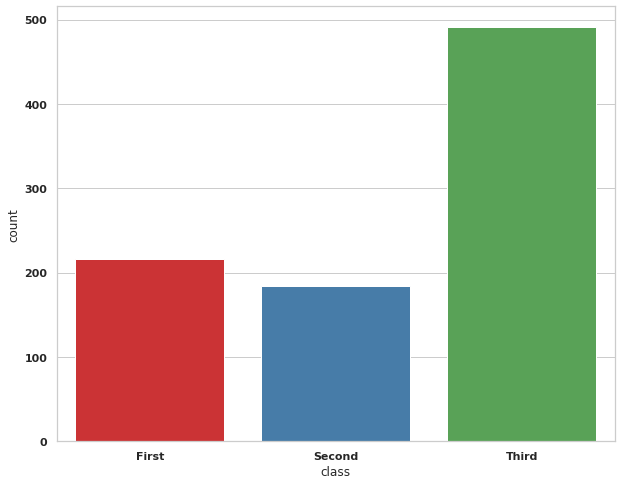

In [42]:
sns.countplot(x='class', data=titanic, palette="Set1")

There aren't variations in **Count Plot** as such, hence I decided to give you an insight of plot within this lecture itself. As you may notice, aesthetically both, **Count Plot** and **Bar Plot** are pretty identical. Here, the **Count Plot** actually displays the `number of passengers` travelling on `Titanic` in respectivve `Class`, that is labelled on `X-axis`.

We could have even set our *Categorical variable* assigned to `Y-axis` to get *Horizontal bars* like this:

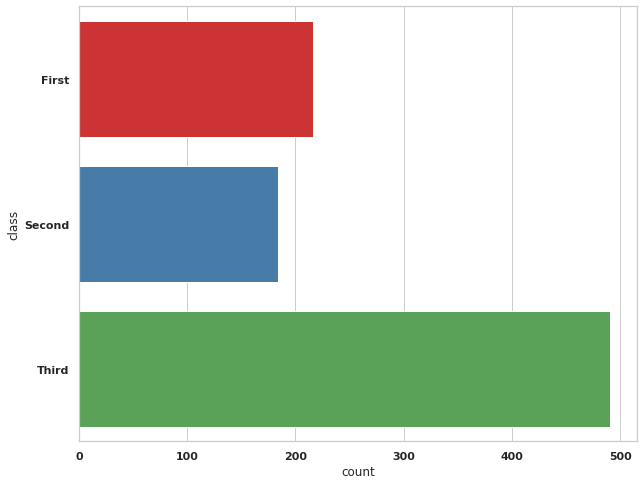

In [36]:
sns.countplot(y='class', data=titanic, palette="Set1")

A **Count Plot** can be thought of as a **Histogram** across a *Categorical* variable, instead of a *Quantitative* variable. Basic options are identical to those for **Bar Plot**, so we may ideally compare *counts across nested variables*. That kind of pulls us back to our discussion on *Bar Plot*; where we are going to look into *optional parameters*.

`seaborn.barplot(x=None, y=None, hue=None, data=None, order=None, hue_order=None, estimator=<function mean>, ci=95, n_boot=1000, units=None, orient=None, color=None, palette=None, saturation=0.75, errcolor='.26', errwidth=None, capsize=None, dodge=True, ax=None)`

So, we have `ci = 95` representing **Confidence Interval**; and our first new parameter, i.e. `estimator` which permits any **Statistical function** to estimate within each categorical bin, and convert **Vector** to **Scalar**. In case these words confuse you, let me quickly give you an overview: 

Mathematically, any quantity (or value) that we use, can be divided into two categories, either a **Vector** or a **Scalar**:
- **Scalars** are quantities that are fully described by a magnitude (or say, numerical value) alone. For example: 5 miles 
- **Vectors** are quantities that are fully described by both a magnitude and a direction. For example: Just add a direction to 5 miles; as 5 miles North.
In case the concept still isn't clear, then I hope you understand that I can't dive into *Statistics* in a *Visualization* course. I highly recommend to pick a high school mathematics book and you would be to good to understand these concepts.

Moving on with parameters, for supporting computation of **Confidence Intervals**, we've:
- `n_boot` to handle number of **bootstrap iterations**.
- `errcolor` & `errwidth` to represent **CI color** and **thickness of error bars** respectively.
- `units` as an identifier of observation data points, that shall be used if required to perform multilevel bootstrapping.

Additionally, last parameter of our interest is `capsize` that determines **width of the caps** on error bars.

One by one we shall keep advancing with various types of Bar Plot, thus using each parameter that we discussed. So let us add few variations to our existing plot right away:

findfont: Font family ['Verdana'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Verdana'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Verdana'] not found. Falling back to DejaVu Sans.


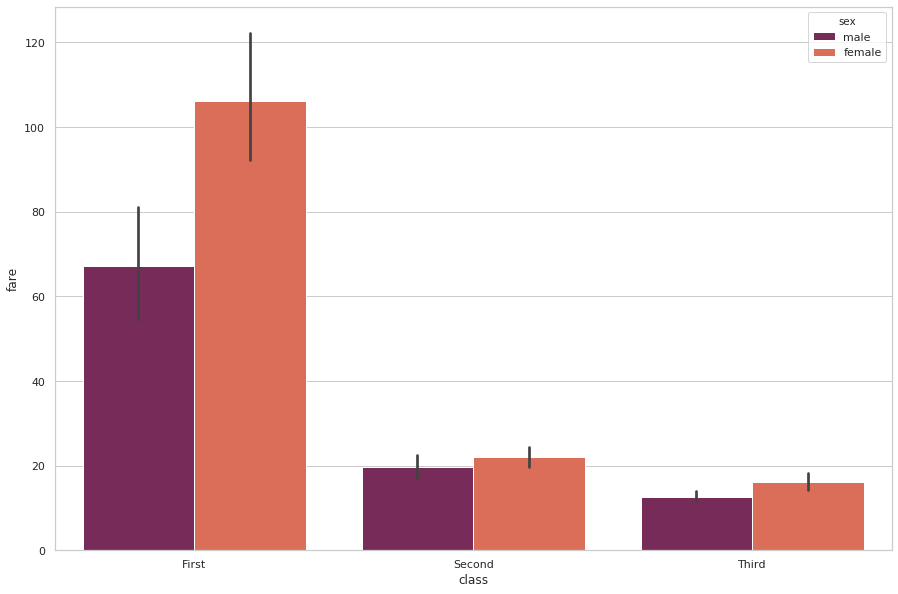

In [5]:
# Using Matplotlib to set figure size and Font style for our plot:
plt.rcParams['figure.figsize'] = (15.0, 10.0)
plt.rcParams['font.family'] = "Verdana"

# Plotting a set of vertical bars with nested grouping by two variables:
sns.barplot(x="class", y="fare", hue="sex", data=titanic, palette="rocket")

I am sure this one isn't difficult to interpret. Oh by the way the **small grey lines** at the top center that you see are actually the **Confidence Interval**. We may alter it to get something like a **Median**. Let's give it a shot:

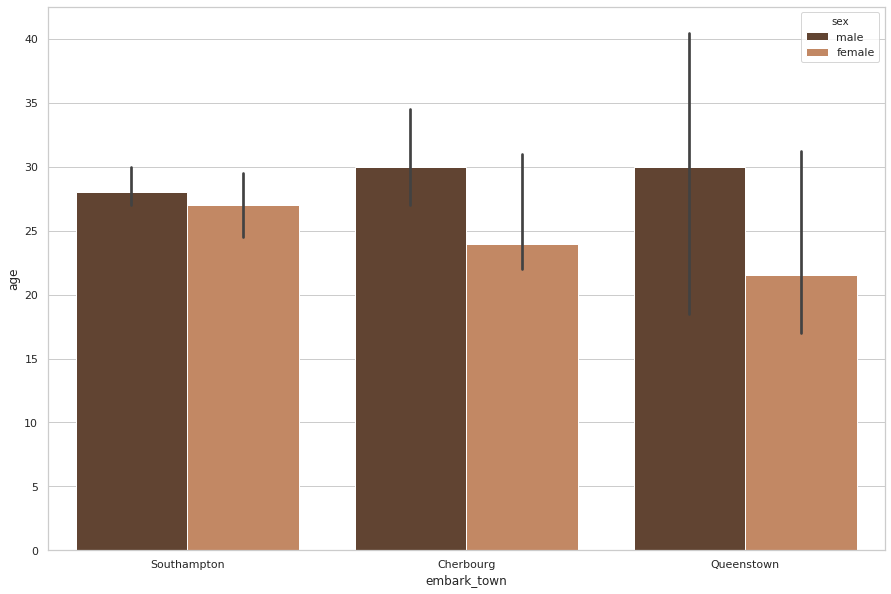

In [6]:
sns.barplot(x="embark_town", y="age", data=titanic, hue="sex", palette="copper", estimator=np.median)

And now adding a **Standard Deviation** function:

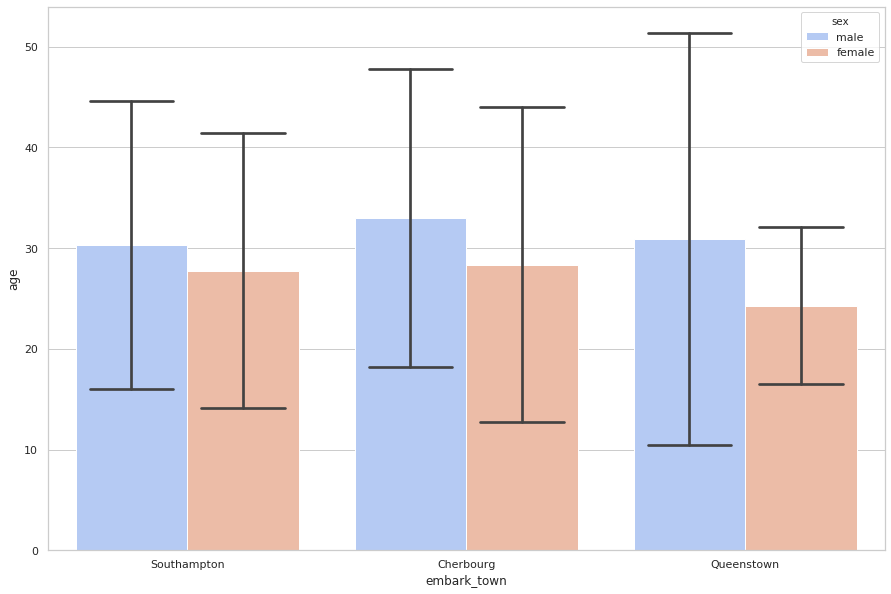

In [7]:
sns.barplot(x="embark_town", y="age", data=titanic, hue="sex", palette="coolwarm", ci="sd", capsize=0.3)

Pretty decent representation of quartiles here, reflecting on *Standard Deviation* of `age` across `embarked town`, based on `Gender`. Let's see what else can Bar Plot do for us:

findfont: Font family ['Verdana'] not found. Falling back to DejaVu Sans.


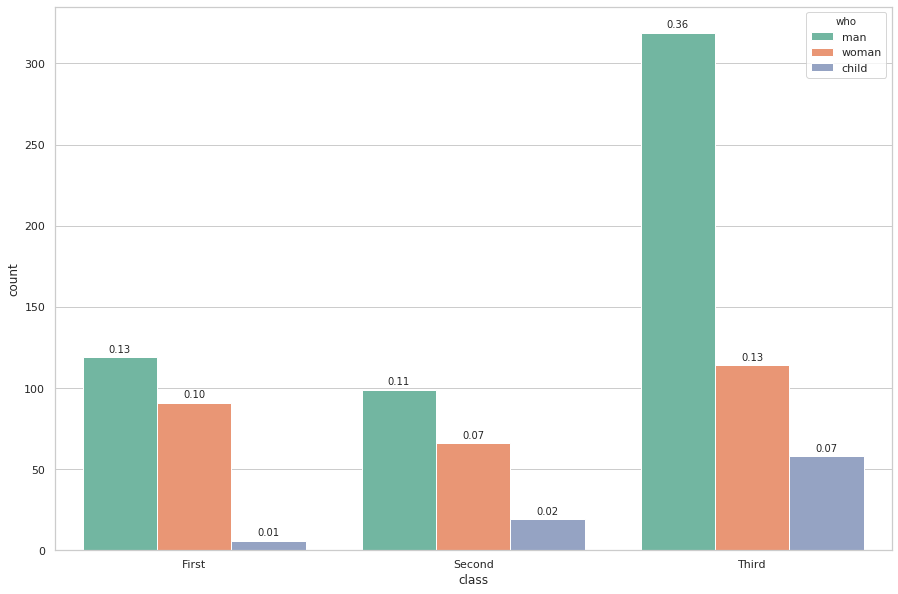

In [8]:
# Taking into account total available values (Setting one person per row):
total = float(len(titanic))

# Plotting our figure (keeping it simple):
ax = sns.countplot(x="class", hue="who", data=titanic, palette="Set2")

# Looping over entire Titanic dataset:
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 3, '{:1.2f}'.format(height/total), ha="center")

Here, instead of a **Bar Plot**, I have used **Count Plot** (remember both are pretty same) to fetch each `class` of passenger & then scored in terms of percentage (on top of each bar); Total `that_particular_class_men` *divided by* `Total that_particular_class` passengers. Grouped with same stats for *Total_women_per_class* divided by *Total per `class` passengers*, and lastly for total children (Total First class children / Total First class) on top of their respective bars.

Certainly you may try customizing this further to play around with the dataset. My intention was to again show you a way to bring **statistical summary** inside the plot using *Matplotlib* `plt.bar`.

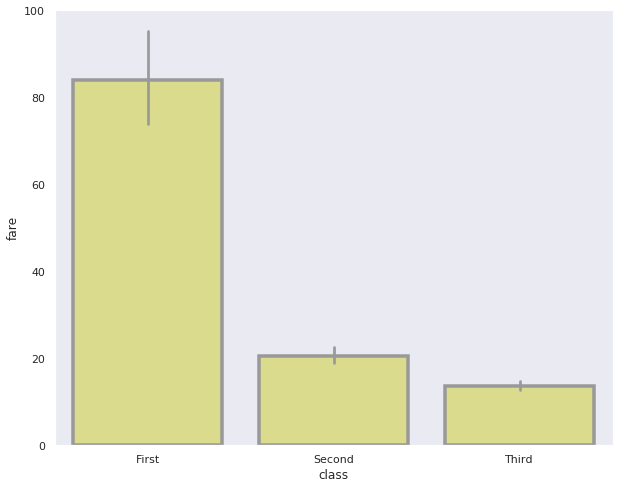

In [9]:
# Few more modifications in Appearance:
plt.rcParams['figure.figsize'] = (10.0, 8.0)
sns.set_style("dark")
sns.barplot(x="class", y="fare", data=titanic, lw=3.5, facecolor=tableau_20[17], errcolor=".6", edgecolor=".6")

This plot has a simple representation of data with no major changes in terms of computation but aesthetically, we have an `errcolor` determining color of the *quartile* and `edgecolor` (that comes from *Matplotlib*) determining *color of edges of the bars*.

By now, we have discussed a lot about **Simple Bar Plot** and **Grouped Bar Plot**. Let us now draft a **Stacked Bar Plot**.

For this experiment, I have built a dummy dataset named **Score Book** that is available for you in your Resource folder. This dataset has *scorecard of 25 students* who had enrolled for *Data Analysis*, *Machine Learning* and *Artificial Intelligence* courses in this fictional university. All the marks obtained by enrolled students in respective tests are scored out of *Total Marks* equalling to **10**. Let us quickly preview this dataset and then try to plot a *Stacked Bar Plot* out of it:

In [20]:
# Loading 'Score Book' Dataset using Pandas:
import os
BASE_DIR = os.path.dirname(os.path.realpath('__file__'))
FILE_DIR = os.path.join(BASE_DIR, 'Datasets')

scorebook = pd.read_csv(f"{FILE_DIR}/Score Book.csv")

# Pre-viewing Dataset:
scorebook.head(10)

Student ID  Analysis  Machine Learning  Artificial Intelligence
0           1  2.393413          3.324129                 0.039631
1           2  3.228434          3.109299                 5.621415
2           3  6.611172          3.603704                 4.830770
3           4  4.553519          5.030114                 4.846976
4           5  4.151165          6.555816                 4.126257
5           6  9.077036          7.478125                 3.321004
6           7  7.039631          8.201300                 2.667565
7           8  3.021069          8.306264                 1.976073
8           9  5.011523          6.622167                 1.220087
9          10  2.006191          4.272699                 0.656404

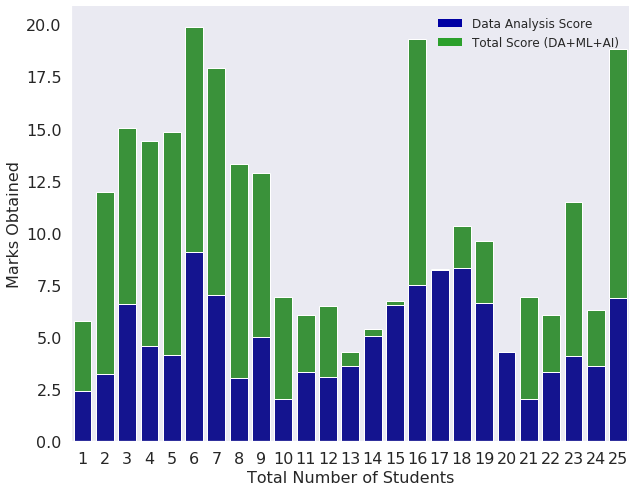

In [27]:
# Importing Dependancy:
import matplotlib as mpl

# Creating a 'Total' column to contain Total marks obtained by each student:
scorebook["Total"] = scorebook['Analysis'] + scorebook['Machine Learning'] + scorebook['Artificial Intelligence']

# Plot 1: 'Total' marks obtained (Placing on Top as Background):
sns.barplot(x = scorebook['Student ID'], y = scorebook["Total"], color = tableau_20[4])

# Plot 2: 'Data Analysis' result (Overlaying at Bottom):
bottom_plot = sns.barplot(x = scorebook['Student ID'], y = scorebook['Analysis'], color = '#0000A3')

# Deciding Aesthetics (Look into Matplotlib for customization):
topbar = plt.Rectangle((0,0), 1, 1, fc= tableau_20[4], edgecolor = "None")
bottombar = plt.Rectangle((0,0),0,0, fc= '#0000A3', edgecolor = "None")
l = plt.legend([bottombar, topbar], ["Data Analysis Score", "Total Score (DA+ML+AI)"], loc=1, ncol=1, prop={'size':12})
l.draw_frame(False)

#Optional code - Make plot look nicer
sns.despine()
bottom_plot.set_ylabel("Marks Obtained")
bottom_plot.set_xlabel("Total Number of Students")

#Set fonts to consistent 16pt size
for item in ([bottom_plot.xaxis.label, bottom_plot.yaxis.label] +
             bottom_plot.get_xticklabels() + bottom_plot.get_yticklabels()):
    item.set_fontsize(16)

If a plot cannot speak for itself, then the plot isn't good enough. By now we know everything about Seaborn Bar plot, and what we're covering is just a couple of variations. So leaving aside the underlying Matplotlib code that I used for customization, if you have any confusion if understanding aesthetics of this plot, do let me know in the forum.

And do remember that this is just one way of doing it, and if we invest more time, we shall be able to do MUCH better so I would leave that as a homework for you guys. Meanwhile, we shall try to obtain the same Stacked Bar Plot but with a little more variation:

Text(0.5, 0, 'Student Enrollment ID')

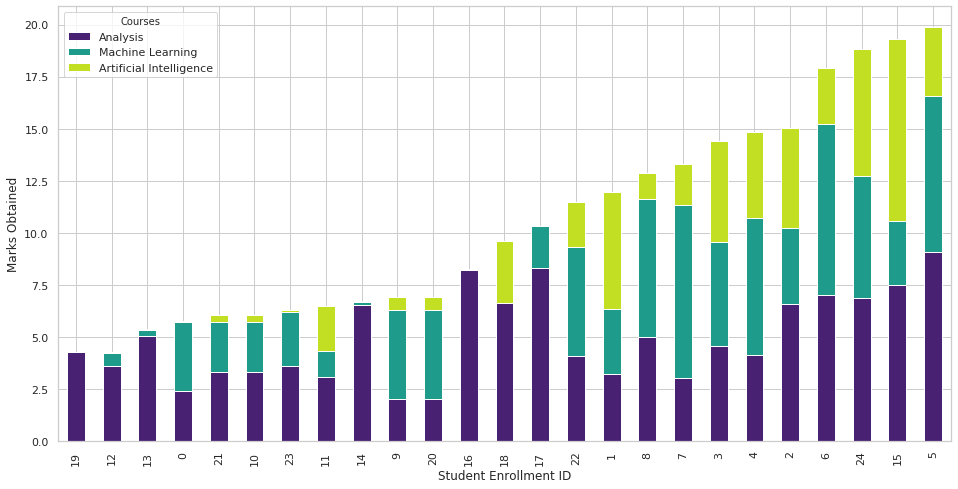

In [30]:
# To make a colormap from a list of Colors:
from matplotlib.colors import ListedColormap
sns.set_style("whitegrid")
import os
BASE_DIR = os.path.dirname(os.path.realpath('__file__'))
FILE_DIR = os.path.join(BASE_DIR, 'Datasets')

scorecard = pd.read_csv(f"{FILE_DIR}/Score Book.csv")
scorecard = (scorecard.T)[1:].reset_index()
scorecard.rename(index=str, columns={'index': 'Courses'}, inplace=True)

ax = scorecard.set_index('Courses')\
  .reindex(scorecard.set_index('Courses').sum().sort_values().index, axis=1)\
  .T.plot(kind='bar', stacked=True,
          colormap = ListedColormap(sns.color_palette("viridis", 10)), 
          figsize = (16,8))

plt.rcParams['font.family'] = "serif"
ax.set_ylabel("Marks Obtained")
ax.set_xlabel("Student Enrollment ID")

With enough on plate for Stacked Bar Plot, let us now try to design another variation, i.e. **Point Plot**.

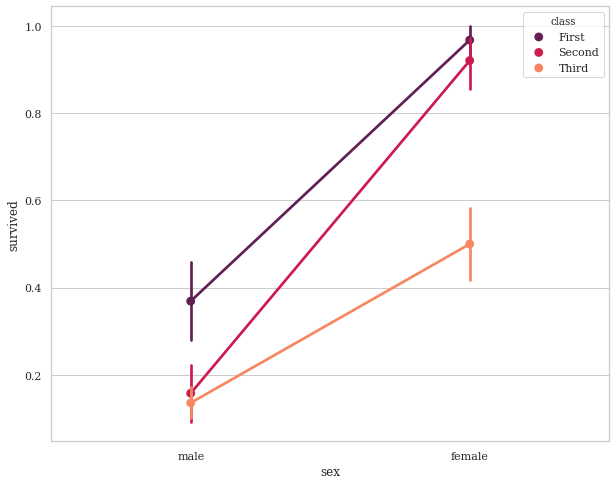

In [31]:
sns.pointplot(x="sex", y="survived", hue="class", data=titanic, palette="rocket")

So, a **Point Plot** just plots the *Point estimate* and *Confidence Interval* and connects points from the same `hue` category. As our eyes are pretty good at picking up on differences of slopes, it is easy to see how the main relationship is changing as a *function of a second variable*.

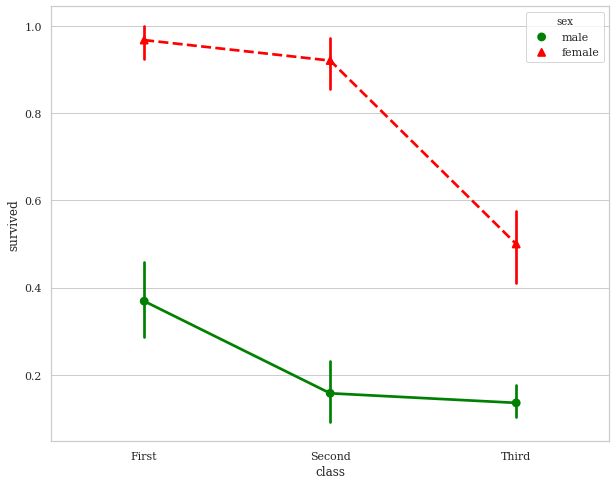

In [32]:
sns.pointplot(x="class", y="survived", hue="sex", data=titanic, palette={"male": "g", "female": "r"},
              markers=["o", "^"], linestyles=["-", "--"]);

Now once done with all these variations, let me lastly focus on *getting some labels and random data value on top of each bar* because this is something you might often require in your presentations and I wouldn't like you to miss on it. Let us get started:  

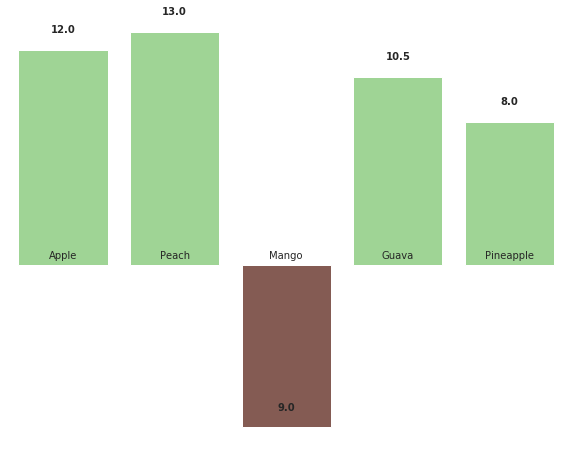

In [33]:
# Creating random data:
x = ['Apple', 'Peach', 'Mango', 'Guava', 'Pineapple']
y = [12, 13, -9, 10.5, 8]

# Background Styling:
sns.axes_style('white')
sns.set_style('whitegrid')

# Declaring colors and directing Bar Plot:
colors = [tableau_20[5] if _y >=0 else tableau_20[10] for _y in y]
ax = sns.barplot(x, y, palette=colors)

for n, (label, _y) in enumerate(zip(x, y)):
    ax.annotate(s='{:.1f}'.format(abs(_y)), xy=(n, _y), ha='center', va='center', xytext=(0,20), 
                textcoords='offset points', weight='bold')

    ax.annotate(s=label, xy=(n, 0), ha='center', va='center', xytext=(0,10), textcoords='offset points')

# Axes formatting:
ax.set_yticks([])
ax.set_xticks([])
sns.despine(ax=ax, bottom=True, left=True)

Well, completely off-track BUT if you wish to draw a **Stacked Bar plot with Matplotlib**, you may customize and create something like this. Please note that this is just something bonus for you and would have to research on your own if any part of it isn't clear:

Text(0, 0.5, 'Values')

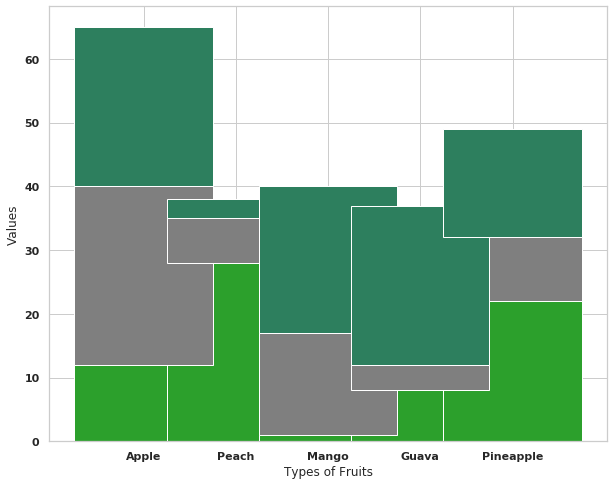

In [34]:
# Importing Dependency:
from matplotlib import rc

# Ensuring bold Y-axis:
rc('font', weight='bold')
 
# Values for each group:
bar1 = [12, 28, 1, 8, 22]
bar2 = [28, 7, 16, 4, 10]
bar3 = [25, 3, 23, 25, 17]
 
# Height of bar1 + bar2:
bars = [40, 35, 17, 12, 32]
 
# Position of bars on X-axis:
pos = [0,1,2,3,4]
 
# Group Name:
fruits = ['Apple','Peach','Mango','Guava','Pineapple']
 
# Create bottom bars:
plt.bar(pos, bar1, color=tableau_20[4], edgecolor='white', width=1.5)
# Create middle bars on top of the first one:
plt.bar(pos, bar2, bottom=bar1, color=tableau_20[14], edgecolor='white', width=1.5)
# Create Top bars:
plt.bar(pos, bar3, bottom=bars, color='#2d7f5e', edgecolor='white', width=1.5)
 
# Custom X axis:
plt.xticks(pos, fruits, fontweight='bold')
plt.xlabel("Types of Fruits")
plt.ylabel("Values")

And that brings us to the end of our discussion on Bar Plots and also pretty much covers our discussion on Categorical Data Plotting. In teh next lecture, we shall try to plot <span style="color:red">"Time Series data"</span> with Seaborn. Till then keep practicing as much as you can using resurces from portals like [Kaggle](https://www.kaggle.com/), [UC Repository](https://archive.ics.uci.edu/ml/datasets.html), etc. In fact, in the notebook I shall attach a link to a [Resource where you shall find almost everything that can help you with datasets and much more](https://medium.com/machine-learning-bootcamp/curated-list-of-100-data-science-resources-for-practitioners-3c0510ed47a3). Specially if you've keen interest in *Data Science* or *Machine Learning*, that would be worth bookmarking for future use.

I shall take your leave now and will see you in the next lecture. Till then, **Happy Visualizing**!